##  Chapter 3

Demonstrate a normal model for the Newcomb's data (BDA3 p. 66).

In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
y = np.loadtxt('light.txt')
print(y)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # ddof=1 -> sample estimate
my = np.mean(y)
print(n,s2,my)
# filtered data
y_pos = y[y > 0]
# sufficient statistics
n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1)
my_pos = np.mean(y_pos)
print('After filtering',n_pos,s2_pos,my_pos)


[ 28.  26.  33.  24.  34. -44.  27.  16.  40.  -2.  29.  22.  24.  21.
  25.  30.  23.  29.  31.  19.  24.  20.  36.  32.  36.  28.  25.  21.
  28.  29.  37.  25.  28.  26.  30.  32.  36.  26.  30.  22.  36.  23.
  27.  27.  28.  27.  31.  27.  26.  33.  26.  32.  32.  24.  39.  28.
  24.  25.  32.  25.  29.  27.  28.  29.  16.  23.]
66 115.46200466200466 26.21212121212121
After filtering 64 25.841269841269842 27.75


In [4]:
# for mu, compute the density in these points
tl1 = [10, 40]
t1 = np.linspace(tl1[0], tl1[1], 100)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# compute the exact marginal density for mu for the filtered data
pm_mu_pos = (
    stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1) /
    np.sqrt(s2_pos/n_pos)
)

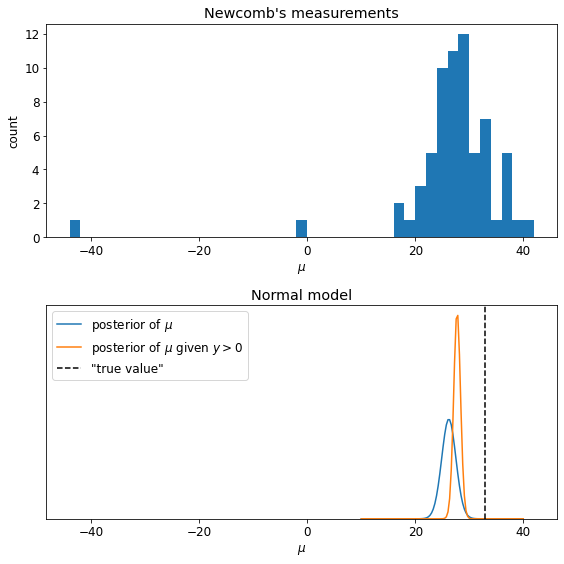

In [6]:
# Plotting

# create figure
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

# plot histogram
ax = axes[0]
ax.hist(y, np.arange(-44, 43, 2))
# decorate
ax.set_title('Newcomb\'s measurements')
ax.set_ylabel('count')
ax.set_xlabel('$\mu$')
ax.tick_params(axis='x', reset=True, top=False)

# plot the posterior of mu
ax = axes[1]
ax.plot(t1, pm_mu)
# plot the posterior of mu in the filtered case
ax.plot(t1, pm_mu_pos)
# Plot the currently accepted true value
ax.axvline(33, color='k', linestyle='--')
ax.legend(
    ('posterior of $\mu$',
     'posterior of $\mu$ given $y > 0$',
     '"true value"'),
    loc='upper left'
)
ax.set_title('Normal model')
ax.set_xlabel('$\mu$')
ax.set_yticks(())
# set bottom to zero
ax.set_ylim((0, ax.set_ylim()[1]))

fig.tight_layout()